Cargar los archivos .wav del dataset para ver su nivel.

In [ ]:
import os
import numpy as np
import librosa
import pyloudnorm as pyln
import matplotlib.pyplot as plt
import librosa


In [ ]:


blues_path = 'C:\\Users\\jalma\\Repositories\\machine_learning_challenge\\dataset\\genres_original\\blues'

for file in os.listdir(blues_path)[:10]:
    file_path = os.path.join(blues_path, file)
    y, sr = librosa.load(file_path)

    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    print(f'Loudness of the file {file}: {loudness} dB')



Ahora hago lo mismo pero con las inferencias

Veo los espectrogramas de algunos de los audios en el dataset

In [ ]:
def split_audio(y: np.ndarray,
                sr: int,
                segment_length: int = 3) -> list:    
    """
    Splits an audio file into a specified number of equal segments.

    Parameters
    ----------
    y : np.ndarray
        Audio signal to split.
    sr : int
        Sample rate of the audio signal.
    n_segments : int
        The number of segments to split the audio into (default is 10).
    
    Returns
    -------
    list of np.ndarray
        A list containing the audio segments as numpy arrays.
    """
    samples_per_segment = sr * segment_length
    n_segments = len(y) // samples_per_segment
    remainder = len(y) % samples_per_segment
    segments = []

    start = 0 
    for i in range(n_segments):
        end = start + samples_per_segment

        if i < remainder:
            end += 1
        segment = y[start:end]
        segments.append(segment)
        start = end

    return segments

segment_length = 3
segments = split_audio(y, sr, segment_length)
expected_segment_length = sr * segment_length

for i, segment in enumerate(segments):
    segment = librosa.util.fix_length(segment, size=expected_segment_length)
    
    S = librosa.feature.melspectrogram(y=segment, sr=sr, n_fft=1024, 
                                        hop_length=512, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    assert S_dB.shape == (128, 130), \
        f"Inconsistent spectrogram shape: {S_dB.shape}"  
    

In [ ]:
def plot_spec(fs, S_dB):
    fig, ax = plt.subplots(figsize=(5,3))
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=fs,
                            fmax=16000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB', ticks=[0, -20, -40, -60, -80])
    plt.yticks([512, 1024, 2048, 4096, 8192], ['0.5', '1', '2', '4', '8'])
    plt.ylabel('Frecuency [kHz]')
    plt.xlabel('Time [s]')
    plt.title(f'segment number {i}')
    plt.tight_layout()
    plt.subplots_adjust(left=0.11, right=0.995, top=0.98, bottom=0.15)
    plt.show()

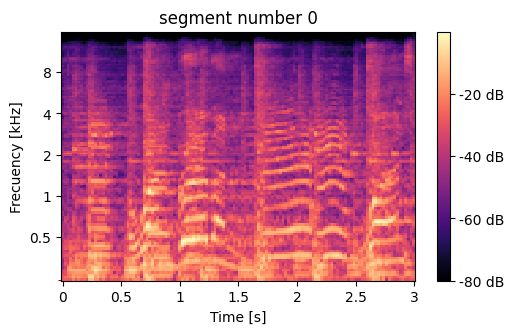

Loudness of the file blues.00000.wav: -17.52670922146246 dB


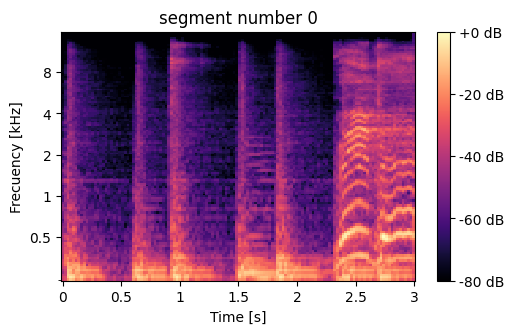

Loudness of the file blues.00001.wav: -20.43872645327597 dB


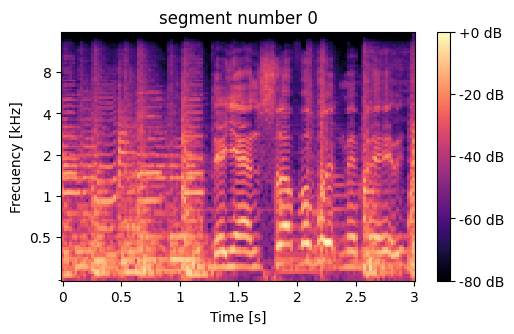

Loudness of the file blues.00002.wav: -14.903780159169354 dB


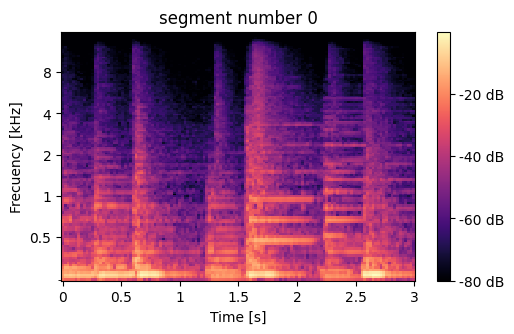

Loudness of the file blues.00003.wav: -17.555090139318697 dB


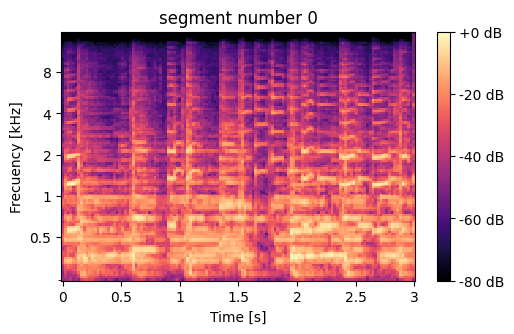

Loudness of the file blues.00004.wav: -19.132409971047515 dB


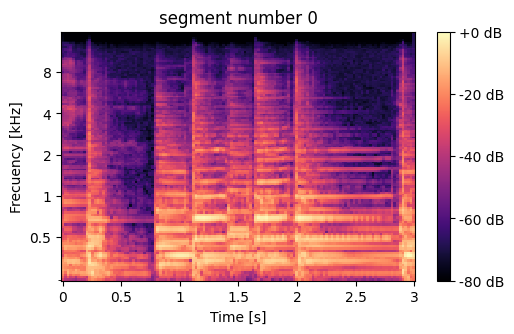

Loudness of the file blues.00005.wav: -17.538009932545254 dB


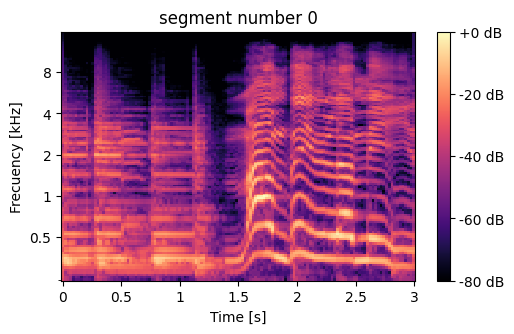

Loudness of the file blues.00006.wav: -14.66566864811852 dB


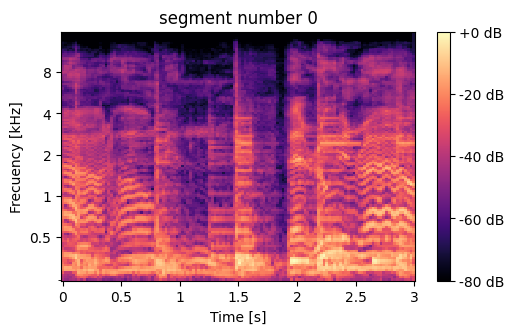

Loudness of the file blues.00007.wav: -16.17836928978003 dB


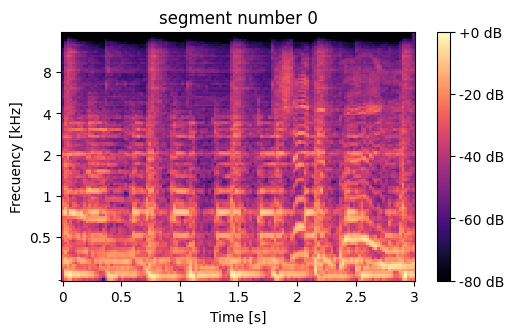

Loudness of the file blues.00008.wav: -17.734219835079404 dB


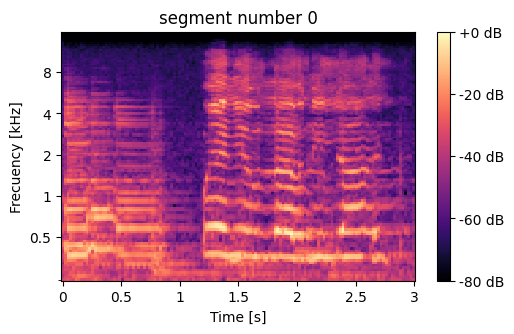

Loudness of the file blues.00009.wav: -18.095996136305267 dB


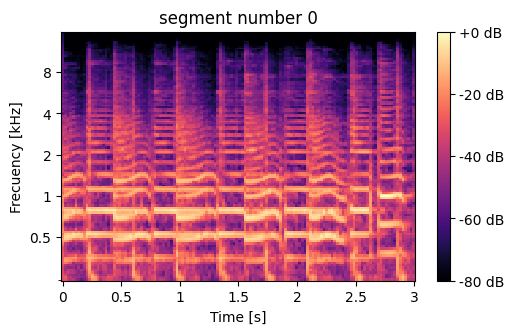

Loudness of the file blues.00010.wav: -14.997846329594575 dB


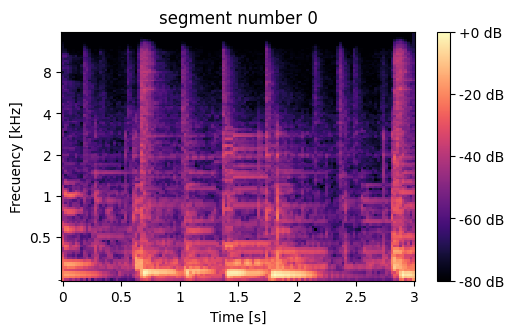

Loudness of the file blues.00011.wav: -22.71641800372255 dB


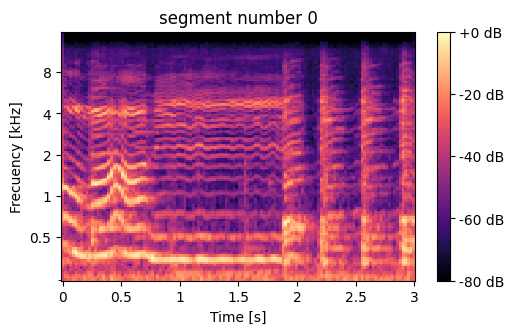

Loudness of the file blues.00012.wav: -17.516568885720446 dB


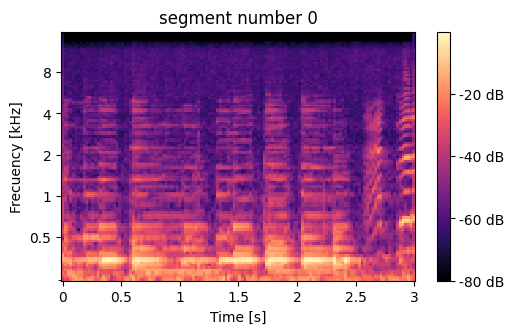

Loudness of the file blues.00013.wav: -18.462341910274514 dB


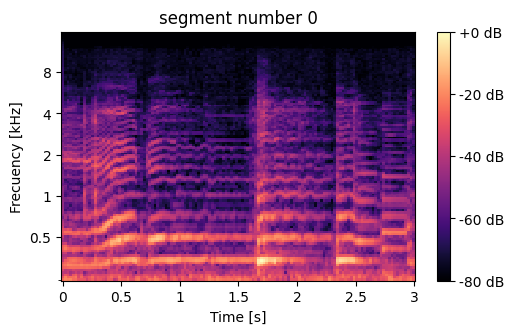

Loudness of the file blues.00014.wav: -19.680853476878518 dB


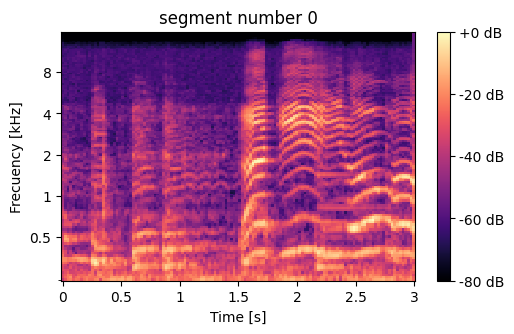

Loudness of the file blues.00015.wav: -19.961671966221285 dB


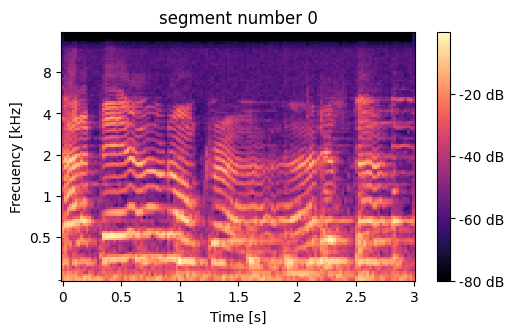

Loudness of the file blues.00016.wav: -19.839339180145625 dB


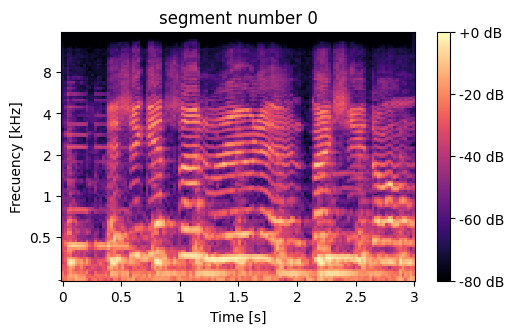

Loudness of the file blues.00017.wav: -20.209194283705738 dB


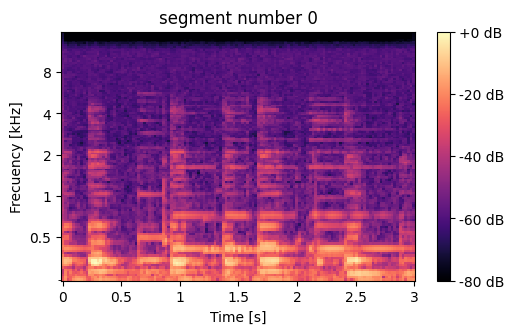

Loudness of the file blues.00018.wav: -20.513055241349182 dB


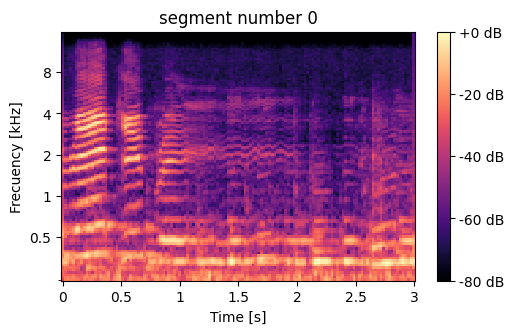

Loudness of the file blues.00019.wav: -19.21626385828319 dB


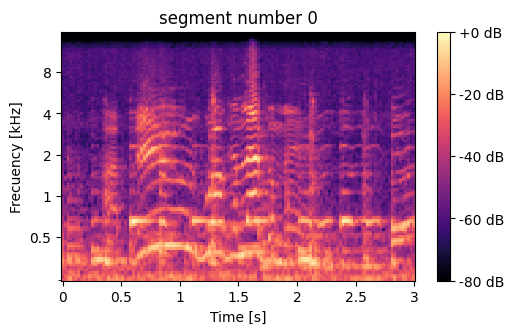

Loudness of the file blues.00020.wav: -21.194910813134452 dB


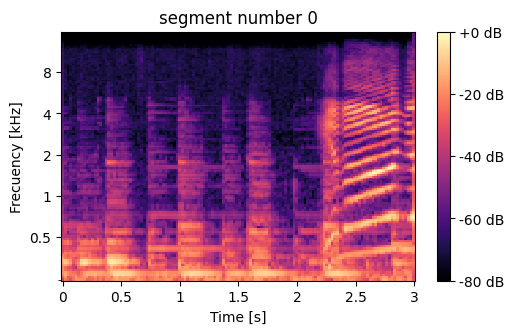

Loudness of the file blues.00021.wav: -18.732456998430838 dB


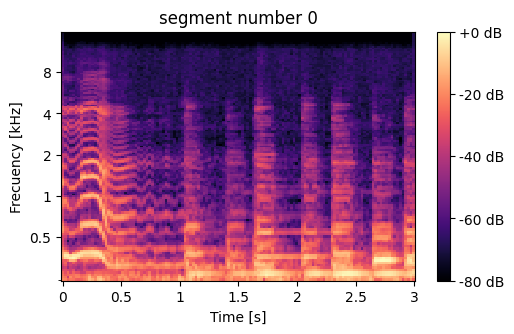

Loudness of the file blues.00022.wav: -17.673351015761135 dB


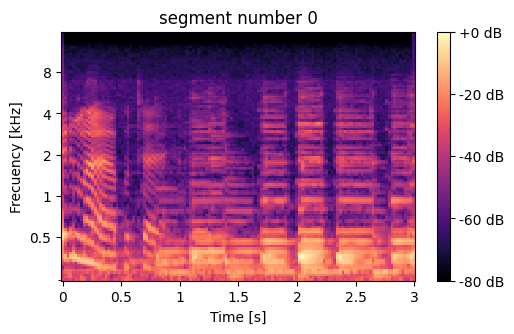

Loudness of the file blues.00023.wav: -18.314931375101086 dB


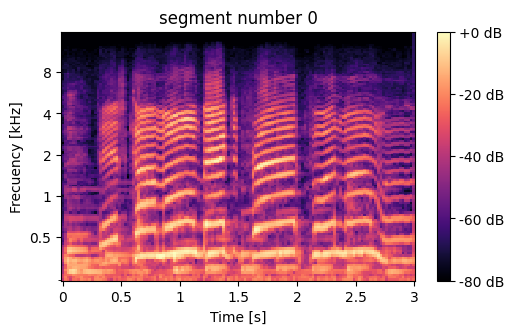

Loudness of the file blues.00024.wav: -20.08189835182541 dB


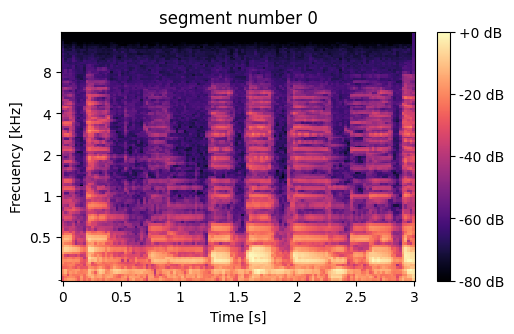

Loudness of the file blues.00025.wav: -19.787029061877256 dB


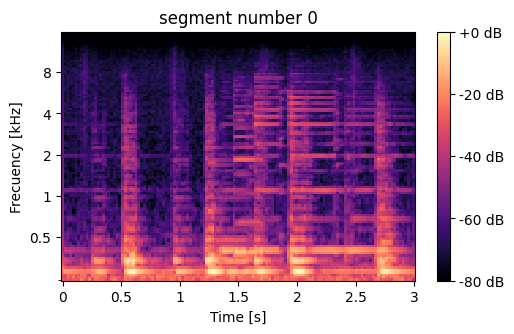

Loudness of the file blues.00026.wav: -18.97692980791759 dB


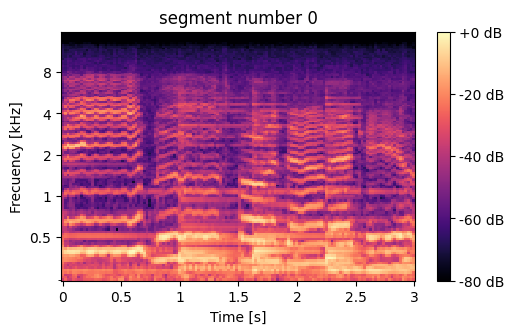

Loudness of the file blues.00027.wav: -19.24389132039023 dB


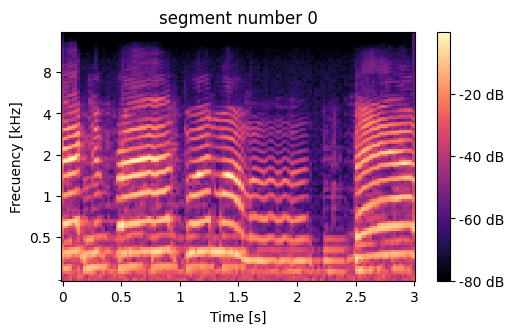

Loudness of the file blues.00028.wav: -18.622684543975634 dB


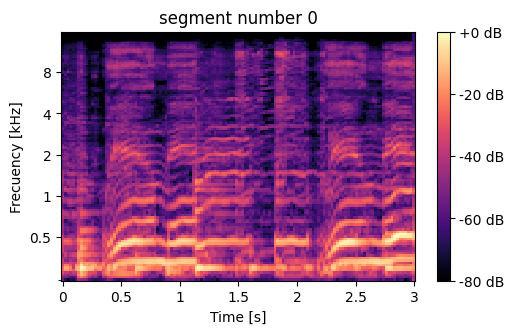

Loudness of the file blues.00029.wav: -17.589504941578834 dB


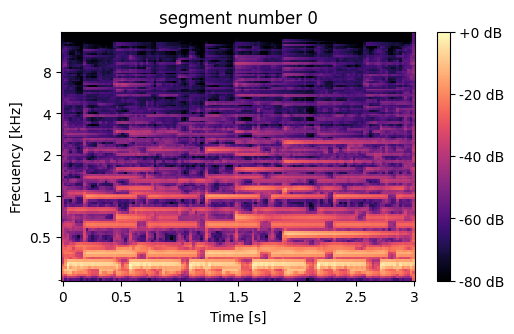

Loudness of the file blues.00030.wav: -15.865834948340696 dB


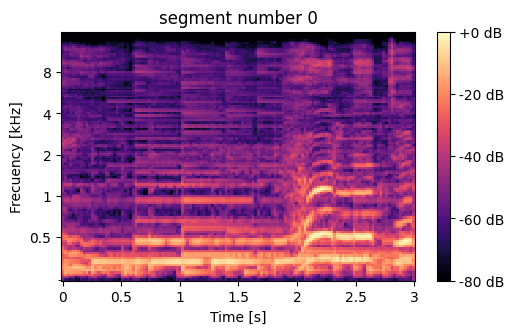

Loudness of the file blues.00031.wav: -16.66865693371189 dB


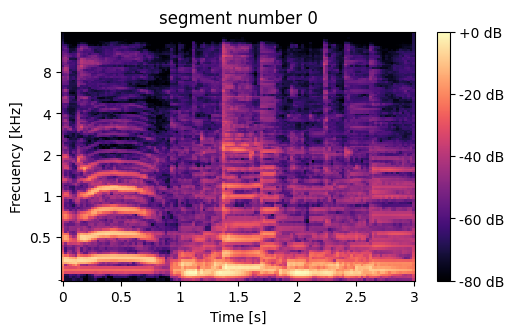

Loudness of the file blues.00032.wav: -19.200282260666366 dB


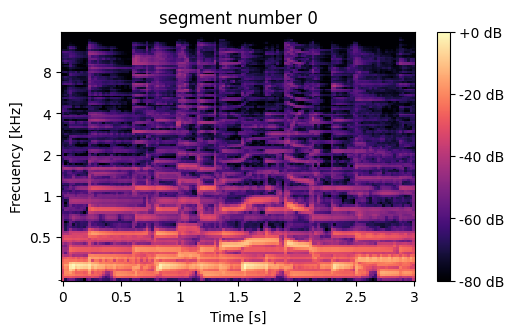

Loudness of the file blues.00033.wav: -17.94353411041769 dB


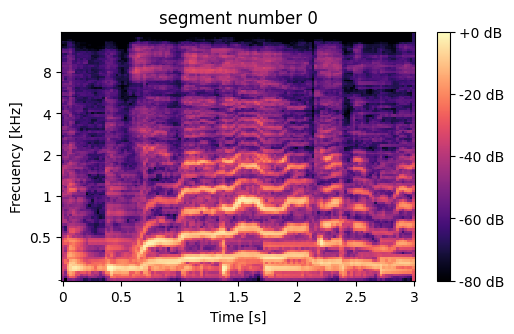

Loudness of the file blues.00034.wav: -17.41101112936354 dB


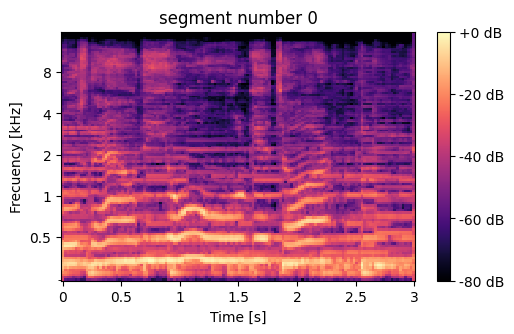

Loudness of the file blues.00035.wav: -15.605907184688645 dB


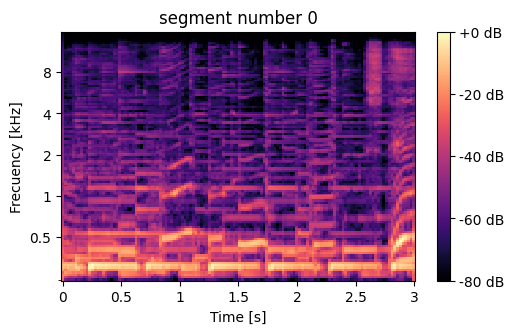

Loudness of the file blues.00036.wav: -14.41789084970826 dB


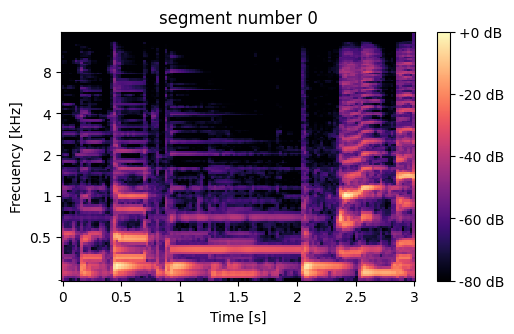

Loudness of the file blues.00037.wav: -22.076571367904407 dB


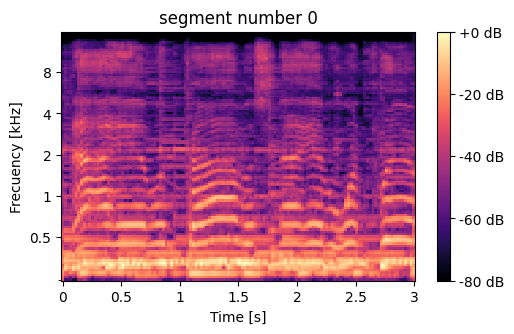

Loudness of the file blues.00038.wav: -15.810630890431815 dB


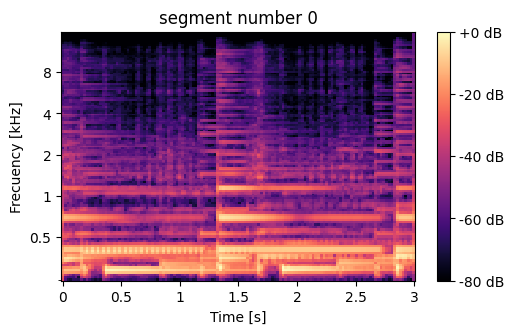

Loudness of the file blues.00039.wav: -20.821292191049704 dB


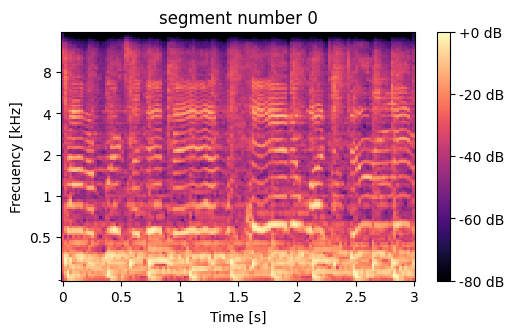

Loudness of the file blues.00040.wav: -17.683497993115704 dB


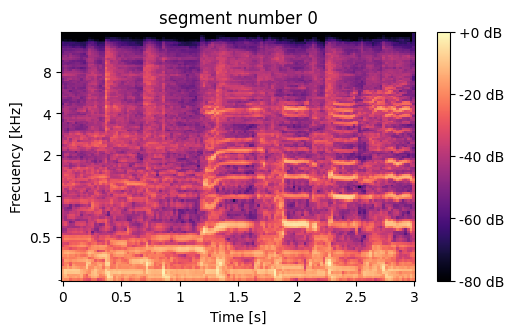

Loudness of the file blues.00041.wav: -18.027212255021663 dB


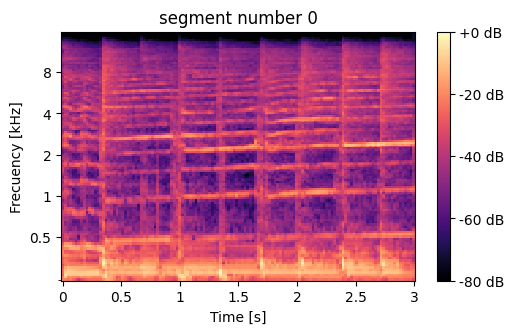

Loudness of the file blues.00042.wav: -19.479185524718698 dB


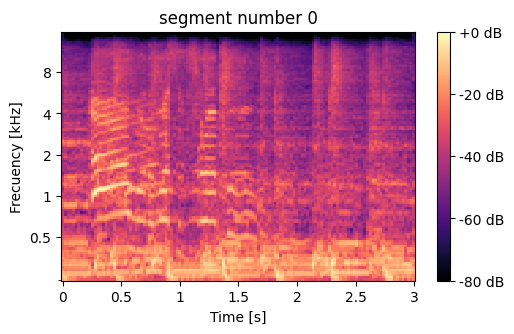

Loudness of the file blues.00043.wav: -17.97005417931688 dB


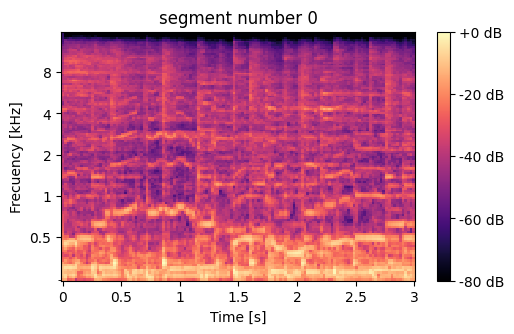

Loudness of the file blues.00044.wav: -17.992574776352853 dB


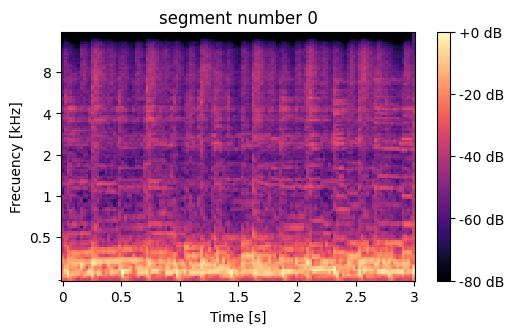

Loudness of the file blues.00045.wav: -17.677293625500337 dB


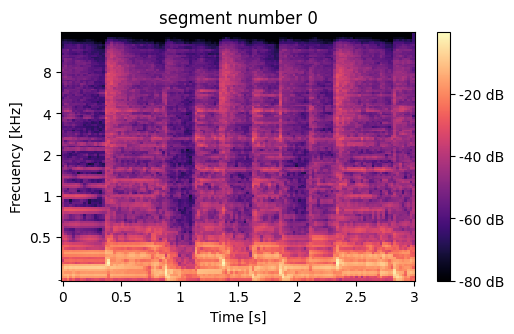

Loudness of the file blues.00046.wav: -20.658127574048663 dB


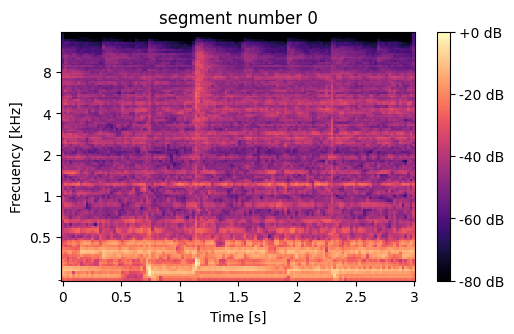

Loudness of the file blues.00047.wav: -19.541043834796028 dB


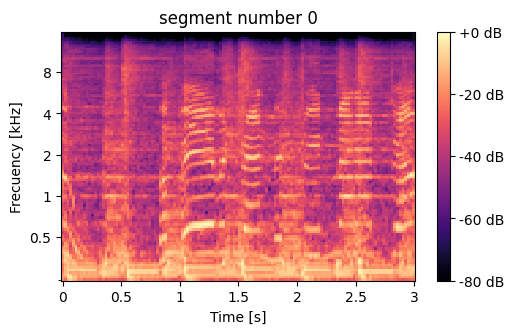

Loudness of the file blues.00048.wav: -17.97401487765591 dB


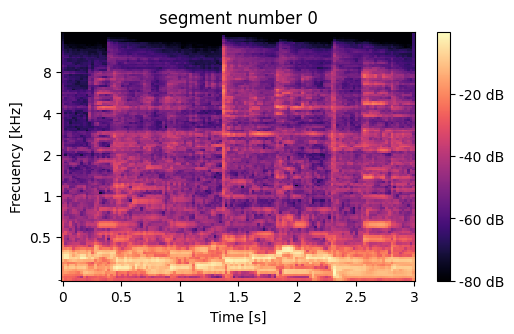

Loudness of the file blues.00049.wav: -21.79362242134383 dB


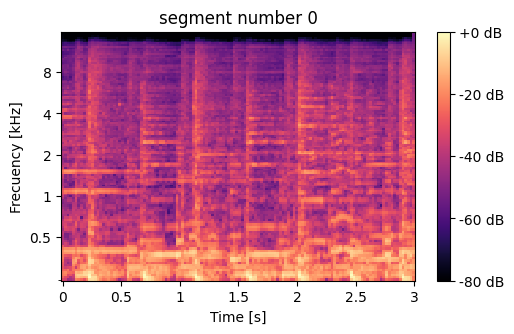

Loudness of the file blues.00050.wav: -15.087060722688248 dB


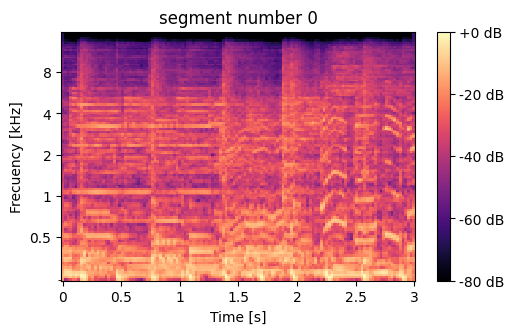

Loudness of the file blues.00051.wav: -14.424076459378417 dB


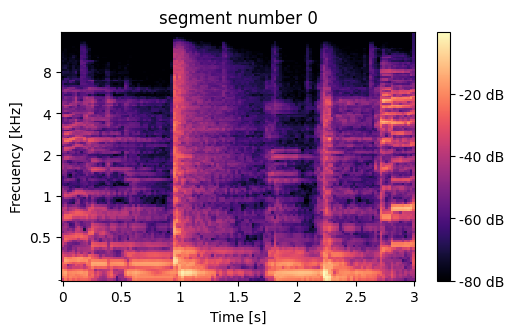

Loudness of the file blues.00052.wav: -19.720307700465696 dB


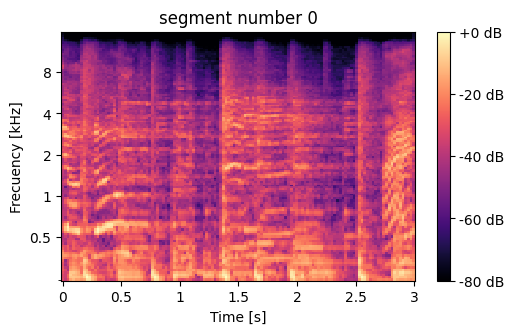

Loudness of the file blues.00053.wav: -14.894914335067963 dB


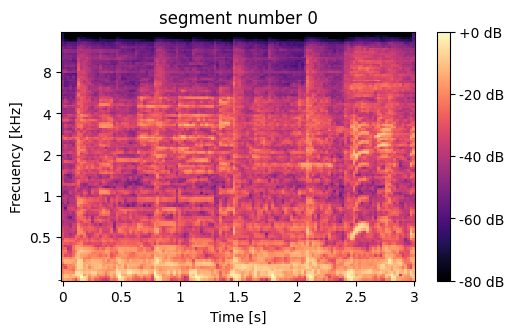

Loudness of the file blues.00054.wav: -13.897552360039438 dB


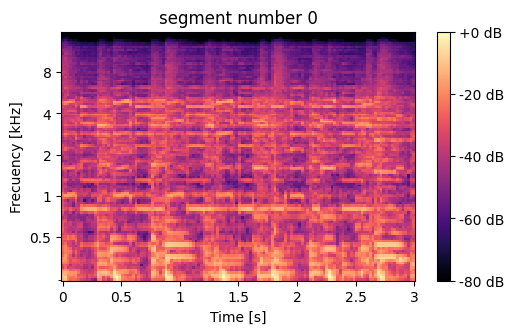

Loudness of the file blues.00055.wav: -15.835226891974886 dB


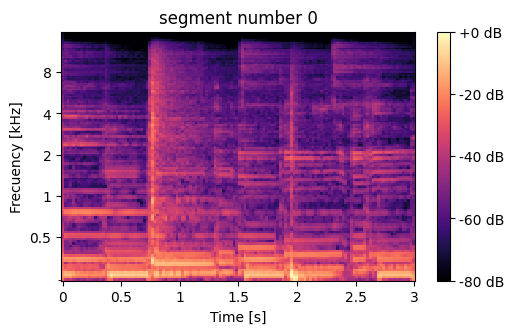

Loudness of the file blues.00056.wav: -17.574020254376073 dB


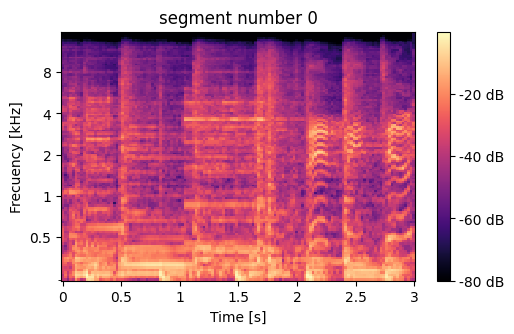

Loudness of the file blues.00057.wav: -15.127208918483989 dB


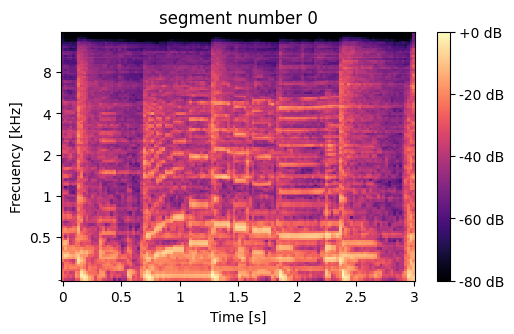

Loudness of the file blues.00058.wav: -15.450092235435797 dB


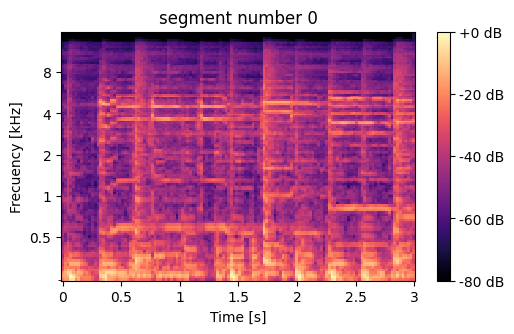

Loudness of the file blues.00059.wav: -15.072386593427304 dB


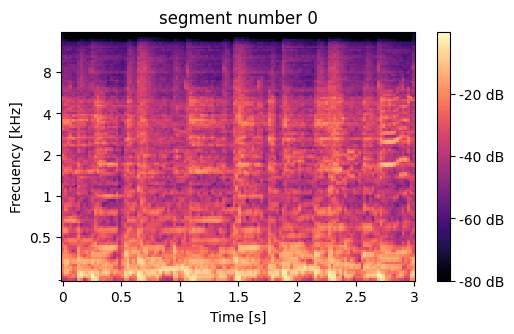

Loudness of the file blues.00060.wav: -14.26491318078367 dB


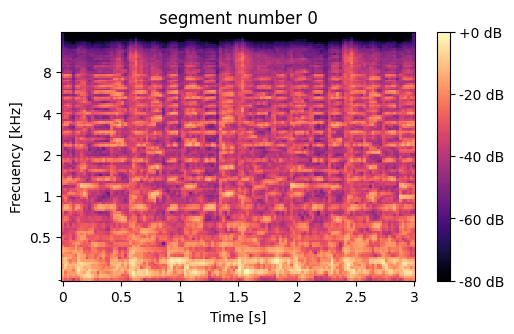

Loudness of the file blues.00061.wav: -16.307234378001645 dB


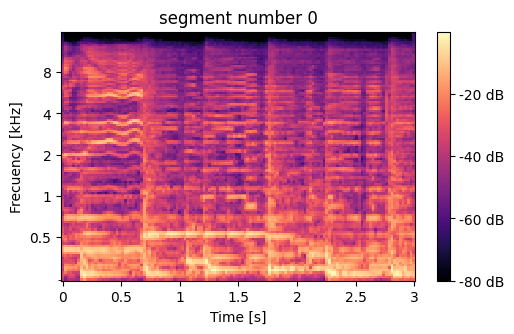

Loudness of the file blues.00062.wav: -18.81368612659345 dB


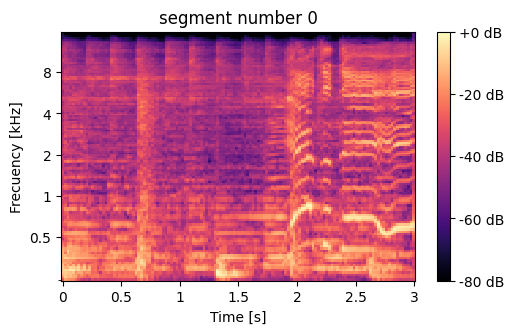

Loudness of the file blues.00063.wav: -18.861302633201664 dB


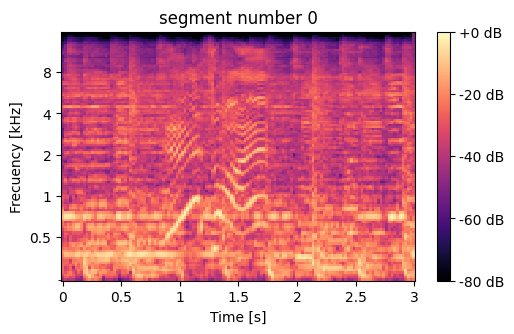

Loudness of the file blues.00064.wav: -18.088014151914713 dB


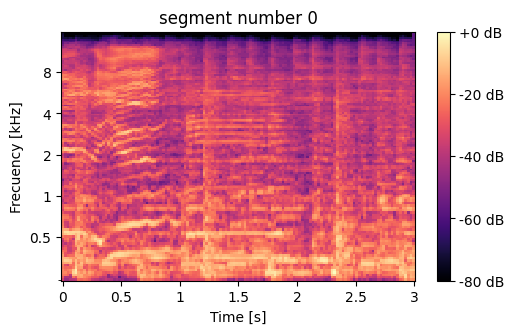

Loudness of the file blues.00065.wav: -18.851779414103074 dB


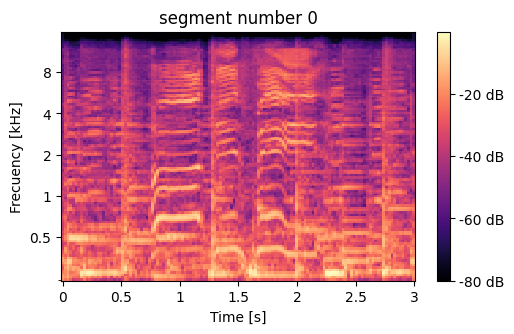

Loudness of the file blues.00066.wav: -18.685492535835344 dB


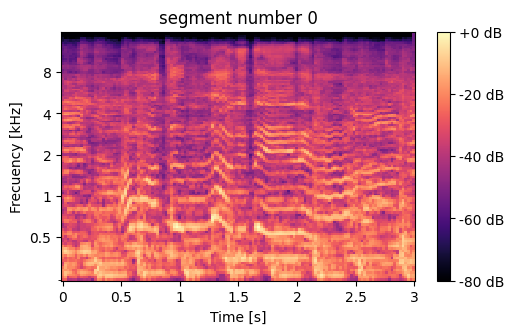

Loudness of the file blues.00067.wav: -17.553937424028145 dB


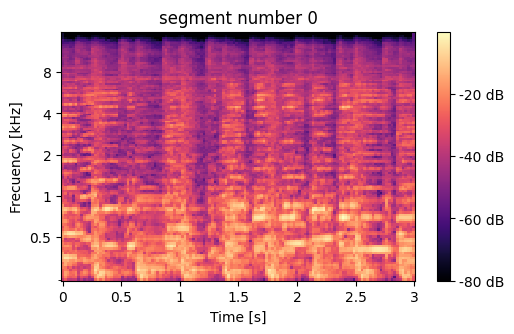

Loudness of the file blues.00068.wav: -19.26268769962801 dB


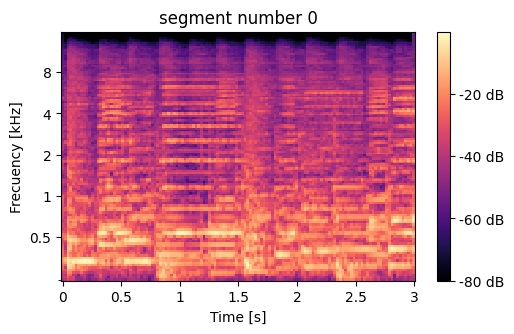

Loudness of the file blues.00069.wav: -17.925522668389622 dB


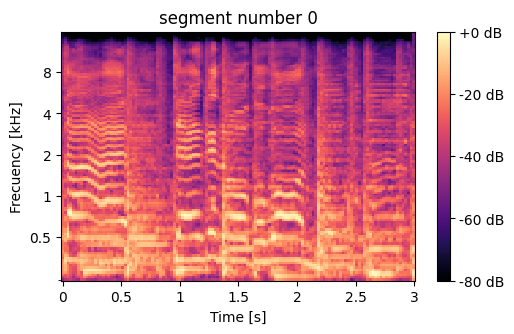

Loudness of the file blues.00070.wav: -18.881495495446345 dB


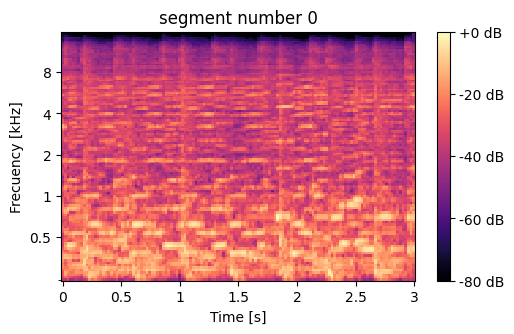

Loudness of the file blues.00071.wav: -18.097257078452685 dB


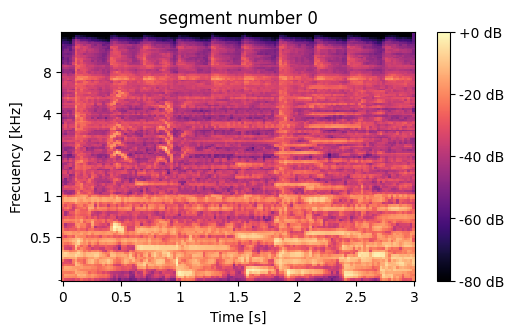

Loudness of the file blues.00072.wav: -19.703749504467055 dB


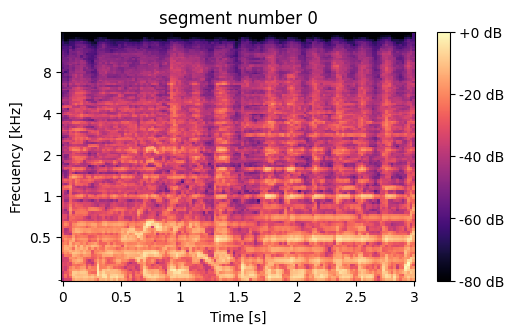

Loudness of the file blues.00073.wav: -11.77350510240038 dB


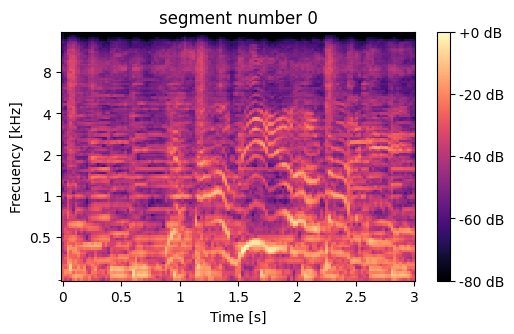

Loudness of the file blues.00074.wav: -13.93166312246113 dB


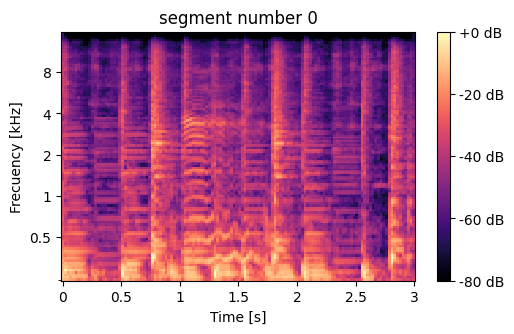

Loudness of the file blues.00075.wav: -13.607033120246138 dB


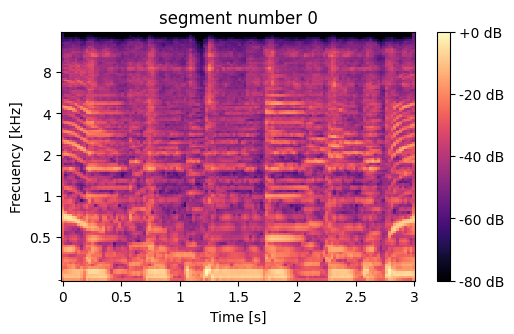

Loudness of the file blues.00076.wav: -12.800659673860137 dB


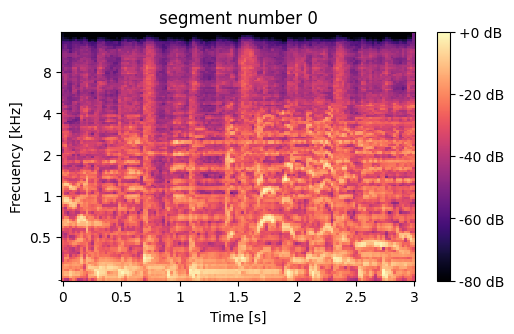

Loudness of the file blues.00077.wav: -11.946126751474546 dB


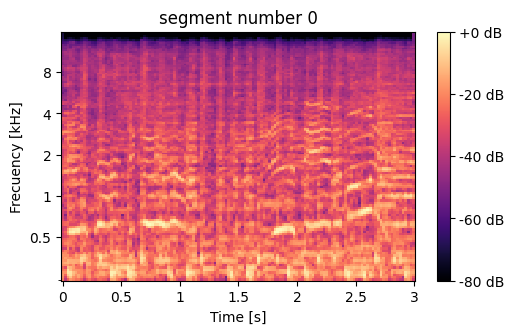

Loudness of the file blues.00078.wav: -11.564981773618463 dB


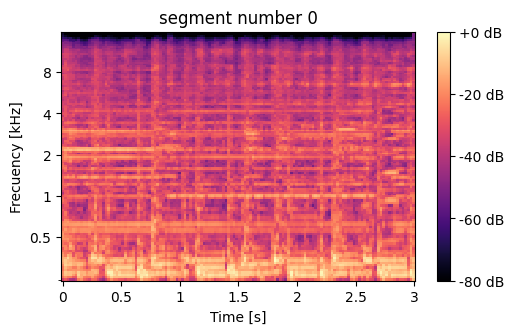

Loudness of the file blues.00079.wav: -11.289592658938904 dB


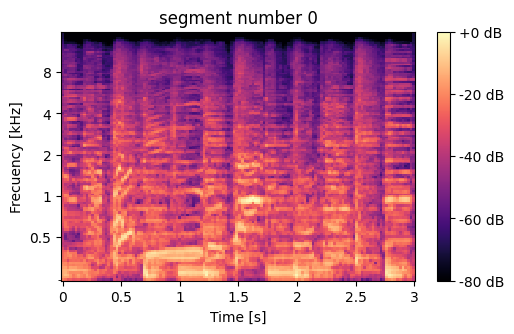

Loudness of the file blues.00080.wav: -12.084095435867482 dB


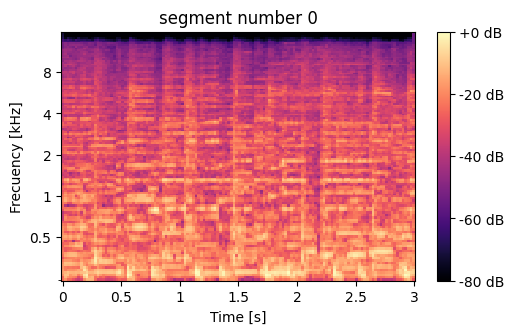

Loudness of the file blues.00081.wav: -11.488289761553162 dB


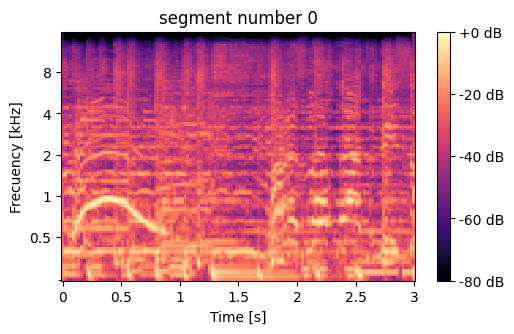

Loudness of the file blues.00082.wav: -11.928111617304802 dB


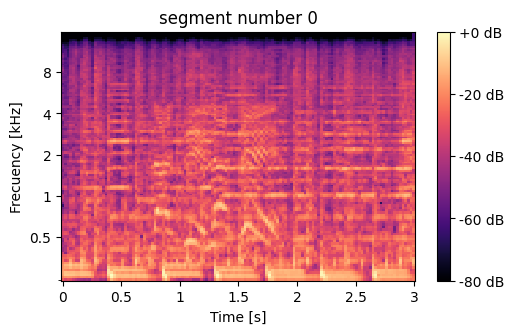

Loudness of the file blues.00083.wav: -12.379829416011289 dB


KeyboardInterrupt: 

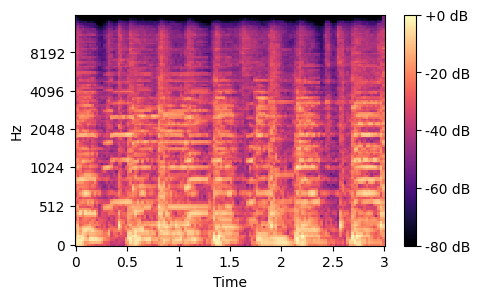

In [17]:
inference_path = 'C:\\Users\\jalma\\Repositories\\machine_learning_challenge\\songs\\wav'
import matplotlib.pyplot as plt

for file in os.listdir(inference_path_path):
    file_path = os.path.join(inference_path_path, file)
    y, sr = librosa.load(file_path)

    segment_length = 3
    segments = split_audio(y, sr, segment_length)
    expected_segment_length = sr * segment_length
    for i, segment in enumerate(segments):
        segment = librosa.util.fix_length(segment, size=expected_segment_length)
        
        S = librosa.feature.melspectrogram(y=segment, sr=sr, n_fft=1024, 
                                            hop_length=512, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)
        if i == 0:
            plot_spec(sr, S_dB=S_dB)
        
        assert S_dB.shape == (128, 130), \
            f"Inconsistent spectrogram shape: {S_dB.shape}"  
        
    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    print(f'Loudness of the file {file}: {loudness} dB')